<a href="https://colab.research.google.com/github/MiladQolami/Neural-Data-Analysis/blob/main/SpikingVariablity/SpikingVariablity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⭕ spiking variablity

---











### Dataset:
The data for this notebook comes from recording form mouse brain by a Neuropixel probes while doing a visual discremination task.
For more information see the paper [Steinmetz et.all, 2019](https://www.nature.com/articles/s41586-019-1787-x).

Here we pick spiking response of some units in the primary visual cortex.


In [1]:
# @markdown Import libraries

# Import pachages
import os, requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 

plt.rcParams['figure.figsize'] = [20,5]
plt.rcParams['font.size'] = 15
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [60]:
# @title Data retrieval
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)

In [ ]:
# @title Data loading
all_data = np.array([])
for j in range(len(fname)):
  all_data = np.hstack((all_data,
                      np.load('steinmetz_part%d.npz'%j,
                              allow_pickle=True)['dat']))
data = all_data[11] # We only choose session 11 for our analysis, according to author this session has several units in visual cortex

The whole dataset contains 39 sessions from 10 mice, data from Steinmetz et al, 2019. Time bins for all measurements are 10ms, starting 500ms before stimulus onset. The mouse had to determine which side has the highest contrast. We have picked just one session (session 11) and stored it in `data`, which is a ditionary with several fields. You can find them using the method `.keys()`. Some of them are as below:


* `data['spks']`: neurons by trials by time bins.    
* `data['brain_area']`: brain area for each neuron recorded. 
* `data['contrast_right']`: contrast level for the right stimulus, which is always contralateral to the recorded brain areas.
* `data['contrast_left']`: contrast level for left stimulus. 
* `data['gocue']`: when the go cue sound was played. 
* `data['response_time']`: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and nearly always does!), but the stimulus on the screen won't move before the go cue.  
* `data['response']`: which side the response was (`-1`, `0`, `1`). When the right-side stimulus had higher contrast, the correct choice was `-1`. `0` is a no go response. 
* `data['feedback_time']`: when feedback was provided. 
* `data['feedback_type']`: if the feedback was positive (`+1`, reward) or negative (`-1`, white noise burst).  
* `data['wheel']`: turning speed of the wheel that the mice uses to make a response, sampled at `10ms`. 
* `data['pupil']`: pupil area  (noisy, because pupil is very small) + pupil horizontal and vertical position.

* `data['reaction_time']`: ntrials by 2. First column: reaction time computed from the wheel movement as the first sample above `5` ticks/10ms bin. Second column: direction of the wheel movement (`0` = no move detected).  



**First of all visualization**

<ipython-input-147-3e3d0bc43410>:4: DeprecationWarning: This function is deprecated. Please call randint(1, 698 + 1) instead
  random_neuron = np.random.random_integers(neuron_n)     # Pick a random neuron


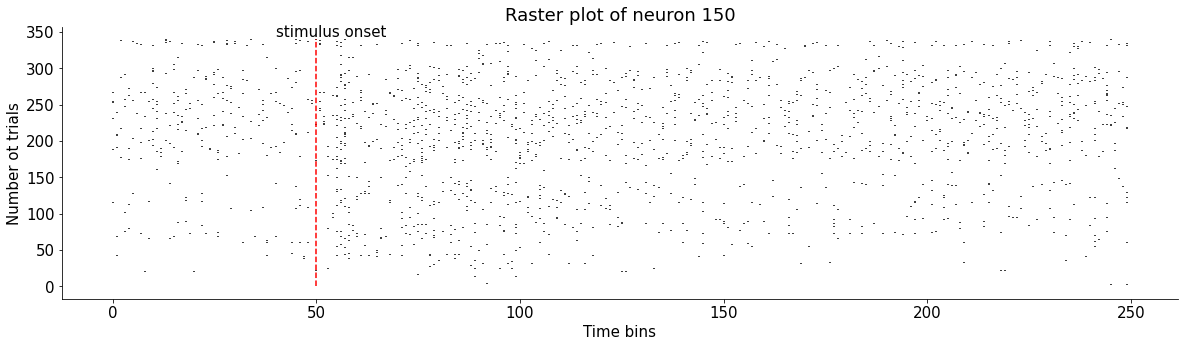

In [147]:
# @markdown Run this cell several times to see raster plot of different neuron in this session
# Raster plot of random neuron 
neuron_n = data['spks'].shape[0]        # Number of neuron in this plot
random_neuron = np.random.random_integers(neuron_n)     # Pick a random neuron
fig, ax = plt.subplots()
for trial_i in range(data['spks'][random_neuron].shape[0]):
  ax.vlines(np.argwhere(data['spks'][random_neuron][trial_i,:]),trial_i,trial_i +1)
ax.vlines(50,0,data['spks'][random_neuron].shape[0],linestyles='dashed',color = 'red')
ax.set(xlabel = 'Time bins', ylabel = "Number ot trials",title=f'Raster plot of neuron {random_neuron}')
plt.text(50 - 10,trial_i+5,'stimulus onset')
plt.show()


In [53]:
data['brain_area'].

(1070,)

Now our spiking data is saved in the `data` which is numpy array. The structure of the data is neuron by trial so we have 698 neuron in this session and 340 trials.Time bins are 10 ms. Spike times are relative to stimulus onset.

In [7]:
visual_cortex = ["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"]  # visual cortex
hippocampus =  ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"],  # hippocampal

In [ ]:
idx = np.isin(data['brain_area'],visual_cortex)   # indices for visual cortex regions
new_data = data['spks'][idx]                     # Only spikes for visual cortex

## Irigularity of inter-spike-interval (ISI)


## Trial-to-tiral variablity





## Spike count corelation